# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I had an appalling experie...
1,"Not Verified | Good points, the cabin crew, t..."
2,"Not Verified | It was a decent flight, reason..."
3,✅ Trip Verified | I really like flying Briti...
4,✅ Trip Verified | Could not book online the ...


In [4]:
df.to_csv("./data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df = pd.read_csv('./data/BA_reviews.csv')

In [6]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I had an appalling experie...
1,1,"Not Verified | Good points, the cabin crew, t..."
2,2,"Not Verified | It was a decent flight, reason..."
3,3,✅ Trip Verified | I really like flying Briti...
4,4,✅ Trip Verified | Could not book online the ...


In [7]:
# Droping unnecessary column -> Unnamed: 0
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

## Step 1 : Cleaning (removing unnecessary thing from data)
Here we are cleaning things like this ✅ Trip Verified , Not Verified and 
We handled here exception also.

In [8]:
temp = []
for i in range(1000):
    try:
        temp.append(df['reviews'][i].split('|')[1])
    except IndexError:
        temp.append(df['reviews'][i])

In [9]:
df['reviews'] = temp

## Text Cleaning (lowercase)
why ??
algo can treat both words in a same way [hello , Hello].

In [10]:
import re
# Clean and lowercase text
df['reviews'] = df['reviews'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

In [11]:
df.sample()

,reviews
102,after paying for tickets for my family inclu...


In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## SentimentIntensityAnalyzer
SentimentIntensityAnalyzer (VADER) is a lexicon-based tool in NLTK for analyzing the sentiment of short, informal text like social media. It scores words and phrases for positive, negative, and neutral intensity, considering context. The output is a set of scores, including a compound score for overall sentiment, which users then interpret using thresholds to classify the text as positive, negative, or neutral. It's quick, requires no training data, and is tailored for online language.

In [13]:
# Download VADER lexicon (only once needed)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\balmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The vader_lexicon is a sentiment lexicon, which is essentially a dictionary (or a structured dataset) containing a list of English words (and some emoticons, acronyms, and initialisms) that are commonly used

In [14]:
# Apply sentiment scoring
def get_sentiment(review):
    score = sid.polarity_scores(review)['compound']
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [15]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

In [16]:
# Add sentiment results to DataFrame
df['sentiment_score'] = df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment'] = df['reviews'].apply(get_sentiment)

In [17]:
df.head()

,reviews,sentiment_score,sentiment
0,i had an appalling experience with british ...,-0.9924,negative
1,good points the cabin crew they were helpful...,0.5625,positive
2,it was a decent flight reasonable comfortabl...,0.4054,positive
3,i really like flying british airways partic...,0.9652,positive
4,could not book online the night before beca...,-0.4767,negative


# Visualization

## 🔤 WordCloud for Positive and Negative Reviews
📌 Objective:
To visually identify the most frequently used words in positive and negative reviews. This helps us understand the language and themes commonly associated with customer satisfaction or dissatisfaction.

## 🧠 Why WordClouds?
They highlight prominent words in a text corpus.

Frequently occurring words appear larger and bolder.

Helps in quickly spotting key patterns in customer sentiment.

Useful for creating visual summaries of text data.

## ⚙️ How it was done:
Reviews were categorized based on sentiment polarity (positive, negative, neutral) using VADER sentiment analysis.

Stopwords (like “the”, “and”, “is”) were removed to focus on meaningful words.

For each sentiment group:

All relevant reviews were combined into a single text.

A WordCloud was generated using the WordCloud class from the wordcloud library.

The WordClouds were displayed using matplotlib.

## ✅ Insights Gained:
In positive reviews, we expect to see words like great, comfortable, excellent, friendly.

In negative reviews, we may observe words like delay, worst, rude, unhelpful.

These visualizations give an intuitive sense of what drives user satisfaction or dissatisfaction.

In [18]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [19]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Optional: Add custom stopwords (domain-specific)
custom_stopwords = {'flight', 'airline', 'ba'}  # add more if needed
all_stopwords = stop_words.union(custom_stopwords)

In [21]:
# Function to clean and join reviews
def get_text_for_sentiment(df, sentiment):
    text = " ".join(df[df['sentiment'] == sentiment]['reviews'])
    # Remove stopwords
    tokens = [word for word in text.lower().split() if word not in all_stopwords]
    return " ".join(tokens)

In [22]:
# Get text for positive and negative reviews
positive_text = get_text_for_sentiment(df, 'positive')
negative_text = get_text_for_sentiment(df, 'negative')

In [23]:
# Generate WordClouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

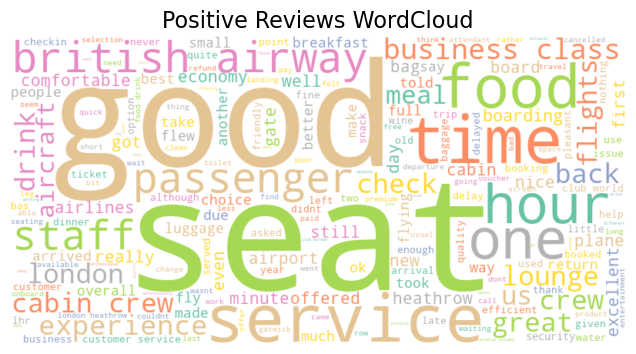

In [24]:
# Plot
plot_wordcloud(positive_text, 'Positive Reviews WordCloud')

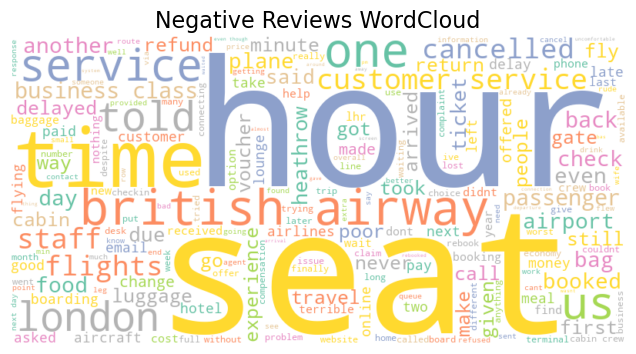

In [25]:
plot_wordcloud(negative_text, 'Negative Reviews WordCloud')

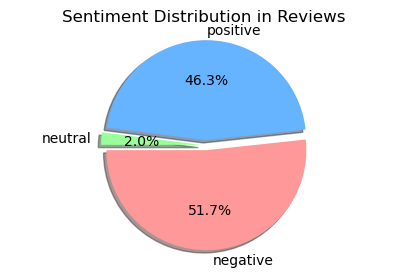

In [26]:
# Count the sentiment values
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Optional: Custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99']  # [positive, negative, neutral] 
explode = (0.05, 0.05, 0.05)  # to slightly "explode" all slices

# Plot the pie chart
plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=180,
        colors=colors, explode=explode, shadow=True)
plt.title('Sentiment Distribution in Reviews')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()

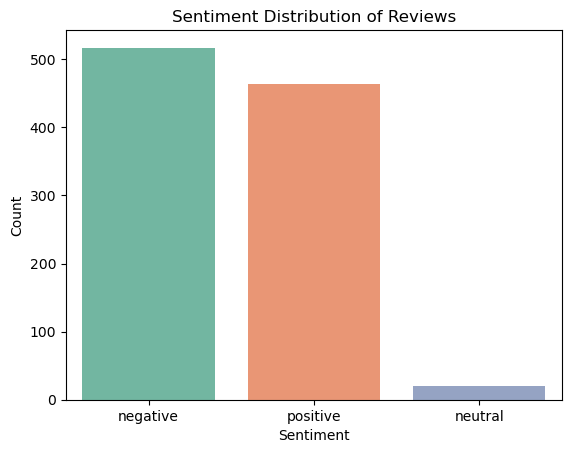

In [27]:
# Sentiment distribution plot
sns.countplot(data=df, x='sentiment', palette='Set2',hue='sentiment')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()